# Práctica 0: Flujo Completo de Machine Learning
## Dataset: Estimation of Obesity Levels Based on Eating Habits and Physical Condition

**Autor:** Jordi Blasco Lozano  
**DNI:** 74527208D  
**Email:** jbl42@alu.ua.es  
**Asignatura:** Aprendizaje Avanzado - Curso 2025/2026  
**Universidad de Alicante - Escuela Politécnica Superior**

## 1. Carga y Exploración Inicial de Datos

In [24]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

# Configuración de visualización
sns.set_palette('husl')

In [25]:
# Cargar el dataset de obesidad desde CSV
# Dataset descargado de: https://archive.ics.uci.edu/dataset/544
df = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')
# Usar colores de tab10 que es compatible con todas las versiones de matplotlib

print("=" * 50)
print("INFORMACIÓN DEL DATASET")
print("=" * 50)
print(f"\nShape: {df.shape}")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

INFORMACIÓN DEL DATASET

Shape: (2111, 17)
Número de filas: 2111
Número de columnas: 17


In [26]:
# Tipos de datos
print("=" * 50)
print("TIPOS DE DATOS")
print("=" * 50)
print(df.dtypes)
print("\n" + "=" * 50)
print("PRIMERAS FILAS")
print("=" * 50)
df.head()

TIPOS DE DATOS
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

PRIMERAS FILAS


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [27]:
# Información general del dataset
print("=" * 50)
print("INFORMACIÓN GENERAL")
print("=" * 50)
print(df.info())
print("\n" + "=" * 50)
print("VALORES FALTANTES")
print("=" * 50)
print(df.isnull().sum())

INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF           

In [28]:
# Identificar columnas numéricas y categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remover la variable objetivo si está en las listas
target_col = 'NObeyesdad'
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print(f"Variables numéricas ({len(numeric_cols)}): {numeric_cols}")
print(f"\nVariables categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"\nVariable objetivo: {target_col}")

Variables numéricas (8): ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Variables categóricas (8): ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

Variable objetivo: NObeyesdad


## 2. Análisis Exploratorio de Datos (EDA)

### 2.1 Estadística Descriptiva

In [29]:
# Estadísticas descriptivas de variables numéricas
print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 60)
df[numeric_cols].describe().round(2)

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [30]:
# Frecuencias de variables categóricas
print("=" * 60)
print("FRECUENCIAS - VARIABLES CATEGÓRICAS")
print("=" * 60)
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

FRECUENCIAS - VARIABLES CATEGÓRICAS

Gender:
Gender
Male      1068
Female    1043
Name: count, dtype: int64

family_history_with_overweight:
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

FAVC:
FAVC
yes    1866
no      245
Name: count, dtype: int64

CAEC:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

SMOKE:
SMOKE
no     2067
yes      44
Name: count, dtype: int64

SCC:
SCC
no     2015
yes      96
Name: count, dtype: int64

CALC:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

MTRANS:
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


### 2.2 Distribuciones Univariadas

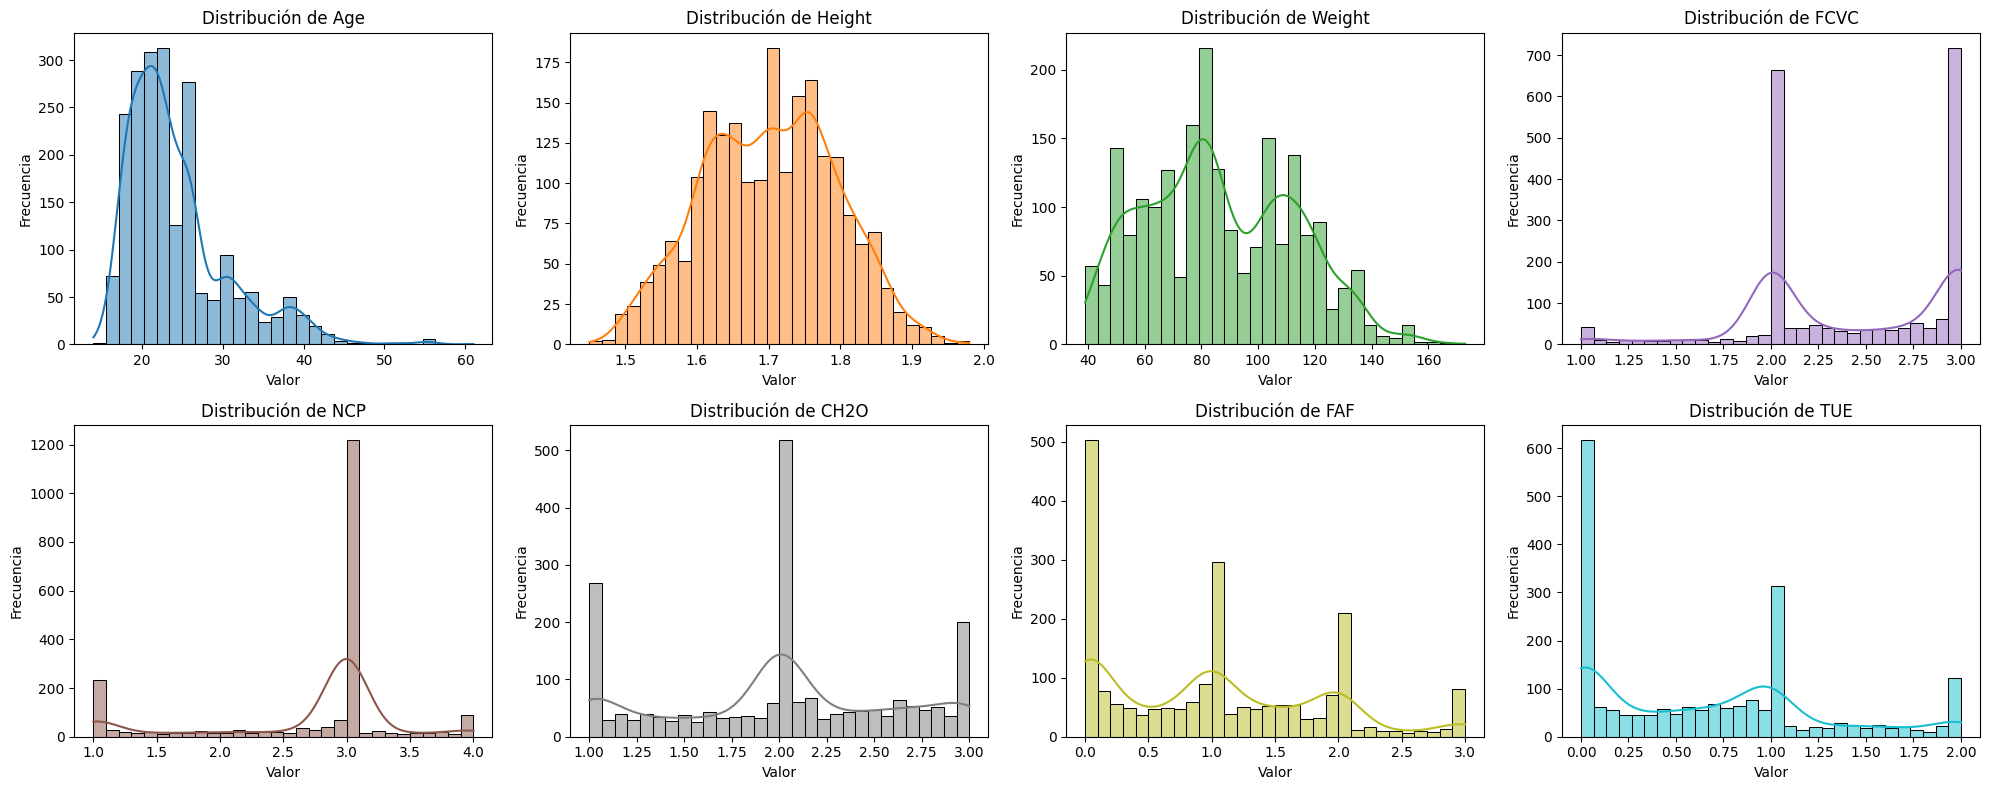

In [31]:
# Histogramas de variables numéricas
n_numeric = len(numeric_cols)
n_cols = 4
n_rows = (n_numeric + n_cols - 1) // n_cols
colors = plt.cm.tab10(np.linspace(0, 1, n_numeric))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[idx], color=colors[idx])
    axes[idx].set_title(f'Distribución de {col}')
    axes[idx].set_xlabel('Valor')
    axes[idx].set_ylabel('Frecuencia')

# Ocultar ejes vacíos
for idx in range(n_numeric, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('images/distribuciones_univariadas.png', dpi=300, bbox_inches='tight')
plt.show()

### 2.3 Tratamiento de Outliers

#### 2.3.1 Búsqueda de outliers

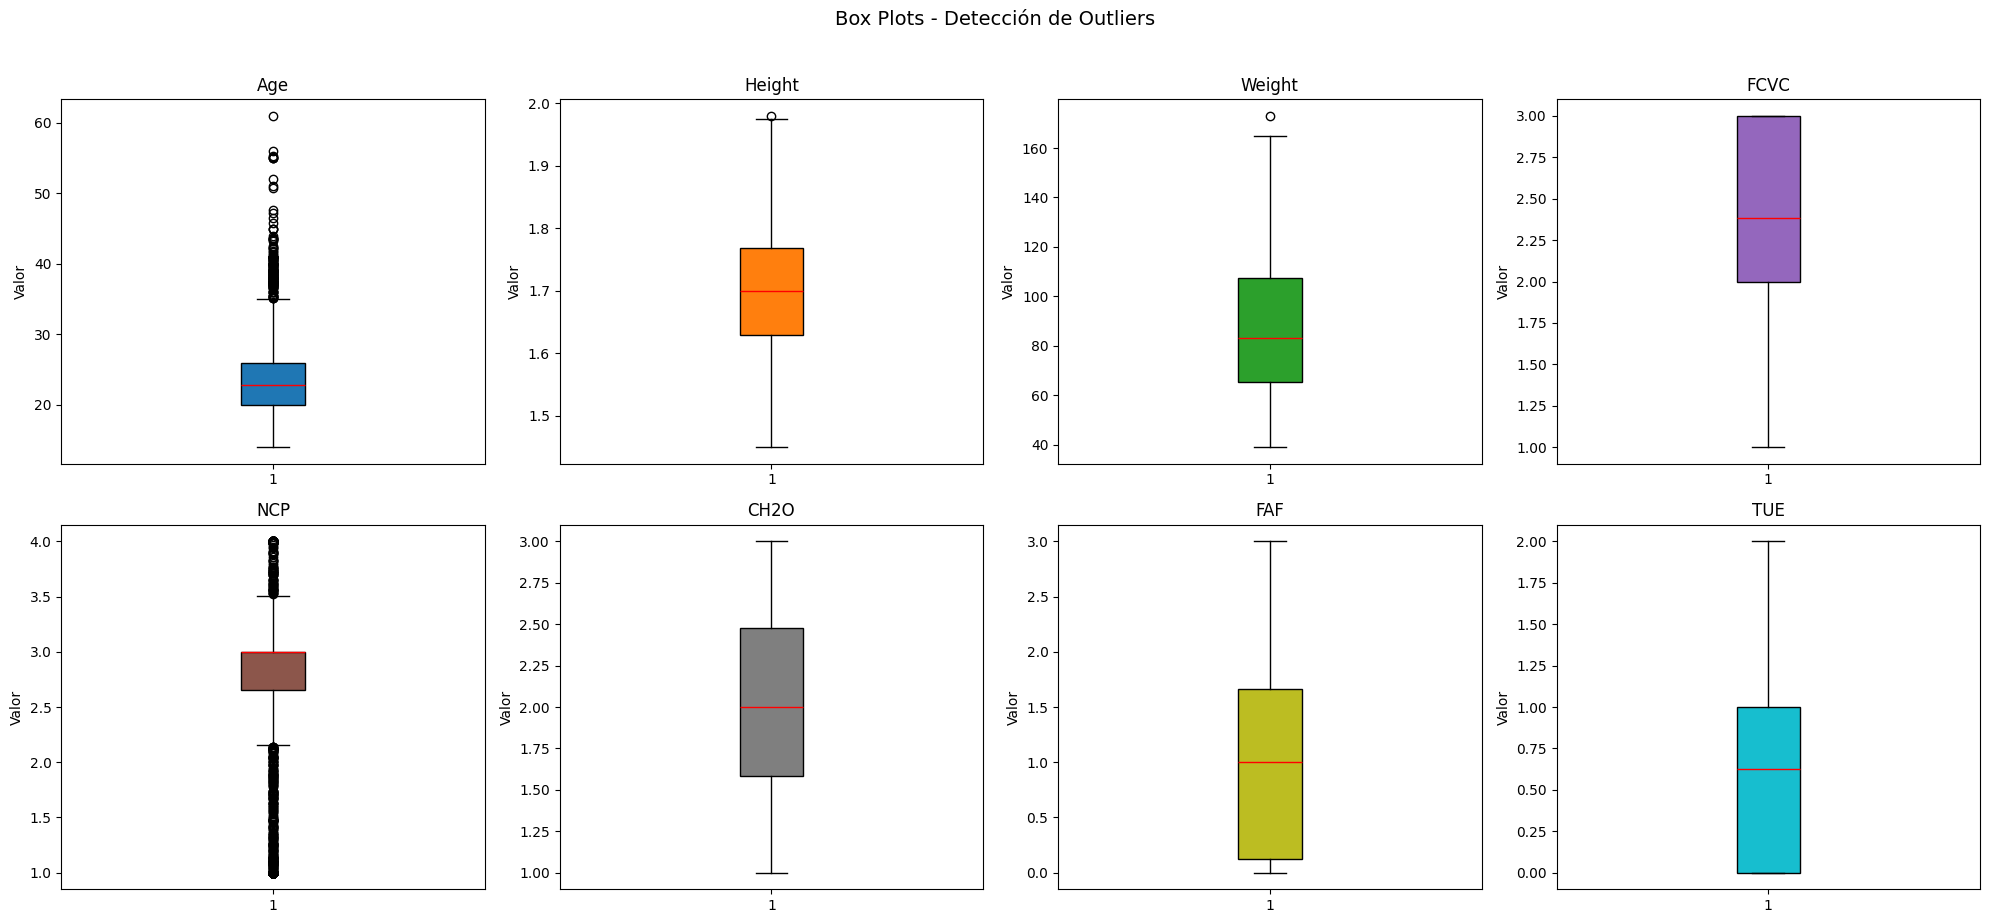

In [32]:
# Box plots para detección de outliers
fig, axes = plt.subplots(2, 4, figsize=(20, 9))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    bp = axes[idx].boxplot(df[col].dropna(), patch_artist=True)
    bp['boxes'][0].set_facecolor(colors[idx])
    bp['medians'][0].set_color('red')
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Valor')

# Ocultar ejes vacíos
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Box Plots - Detección de Outliers', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('images/boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
# Contar outliers por variable usando IQR
print("=" * 50)
print("OUTLIERS DETECTADOS (Método IQR)")
print("=" * 50)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)).sum()
    print(f"{col}: {outliers} outliers ({100*outliers/len(df):.2f}%)")

OUTLIERS DETECTADOS (Método IQR)
Age: 168 outliers (7.96%)
Height: 1 outliers (0.05%)
Weight: 1 outliers (0.05%)
FCVC: 0 outliers (0.00%)
NCP: 579 outliers (27.43%)
CH2O: 0 outliers (0.00%)
FAF: 0 outliers (0.00%)
TUE: 0 outliers (0.00%)


#### 2.3.2 Eliminación y transformación de valores

Siguiendo las prácticas, antes de realizar el split trataremos los outliers de la siguiente forma:

<ol type="a">
  <li><b>Eliminar outliers de Weight y Height:</b> Aparentemente son considerados casos extremos que no queremos en el dataset inicial.</li>
  <li><b>Transformación Box-Cox para Age:</b> Para corregir el sesgo en la distribución de la edad. Y eliminación de los outliers que se salgan de esta nueva distribución.</li>
  <li><b>Explicación de la variable NCP:</b> Esta variable la dejaremos como está por los motivos que se detallarán a continuación.</li>
</ol>

##### a) Eliminacion de los valores individuales fuera de rango de Weight y Height

In [34]:
# 1. Eliminar outliers para Weight y Height
initial_rows = len(df)
cols_to_clean = ['Weight', 'Height']
mask_clean = pd.Series(True, index=df.index)

for col in cols_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask_clean = mask_clean & (df[col] >= lower_bound) & (df[col] <= upper_bound)

df_clean = df[mask_clean].copy()
rows_removed = initial_rows - len(df_clean)

print(f"Filas iniciales: {initial_rows}")
print(f"Filas eliminadas (Weight/Height outliers): {rows_removed}")
print(f"Filas restantes: {len(df_clean)}")

df = df_clean.reset_index(drop=True)

Filas iniciales: 2111
Filas eliminadas (Weight/Height outliers): 2
Filas restantes: 2109


##### b) Transformación Box-Cox para Age

Box-Cox es una técnica estadística que busca transformar una variable no normal en una distribución normal. Pertenece a una familia de transformaciones de potencia parametrizadas por un valor lambda ($\lambda$).
*   Si $\lambda = 1$: No hay transformación (lineal).
*   Si $\lambda = 0.5$: Equivale a una **Raíz Cuadrada**.
*   Si $\lambda = 0$: Equivale a un **Logaritmo** (log).
*   Si $\lambda = -1$: Equivale a una **Inversa** ($1/x$).

**¿Qué significa tu resultado de $\lambda \approx -1.64$?**
Significa que la distribución original requería una corrección muy fuerte, más agresiva que un logaritmo. Matemáticamente sería una inversa potenciada (proporcional a $1/x^{1.64}$). El signo negativo indica una relación inversa, y la magnitud (1.64 > 1) indica la fuerza de la compresión necesaria para normalizar la cola de la distribución.

Usamos Box-Cox en lugar de elegir logaritmo o raíz cuadrada manualmente, porque Box-Cox encuentra el exponente matemático exacto que maximiza la normalidad. Esto minimiza el número de filas que tendríamos que eliminar como outliers.

✓ Transformación Box-Cox aplicada a 'Age' (Lambda: -1.6415)


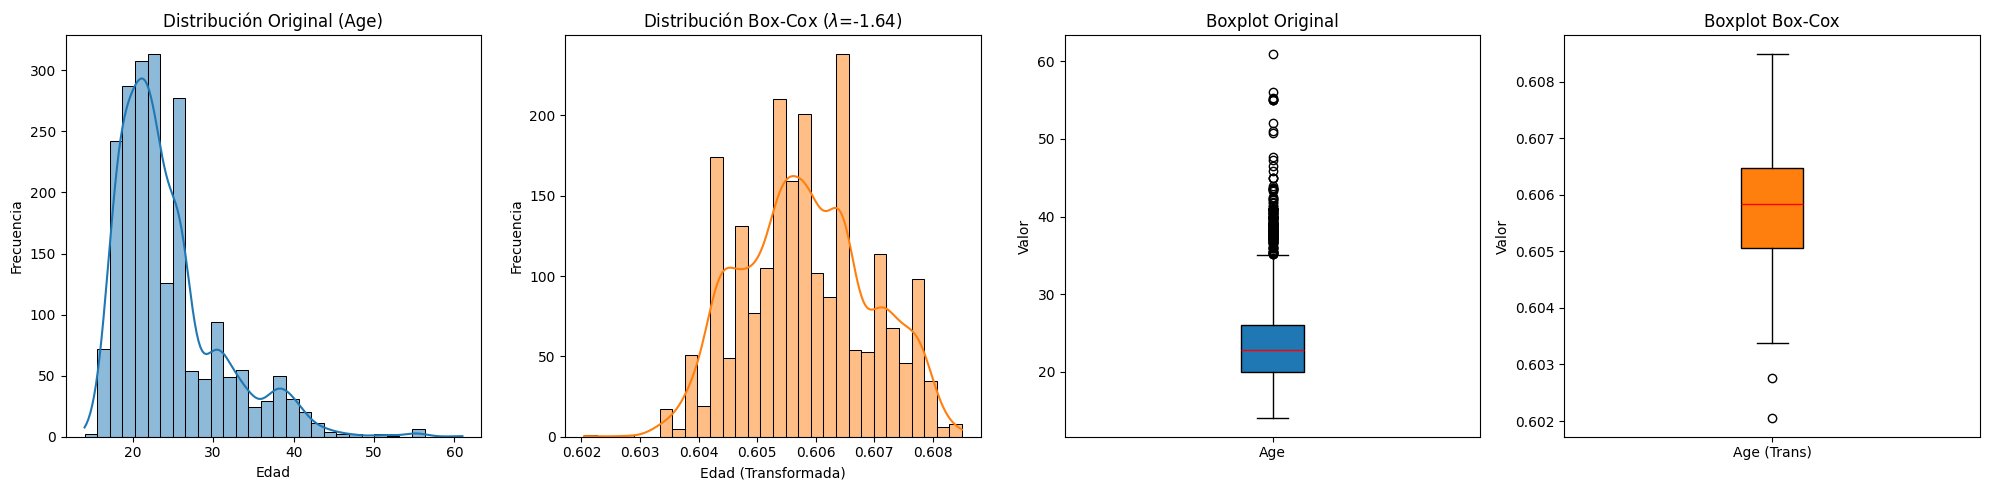


Eliminación de Outliers en Age (Post Box-Cox):
Filas eliminadas: 2
Filas restantes: 2107


In [35]:
# Guardar valores originales para visualizar el cambio
age_before = df['Age'].copy().dropna()

# --- 2.1 Transformación Box-Cox para Age ---
# Esta transformación sí cambia la forma de la distribución para corregir el sesgo
df['Age'], lambda_val = stats.boxcox(df['Age'] + 1)
print(f"✓ Transformación Box-Cox aplicada a 'Age' (Lambda: {lambda_val:.4f})")

# Visualización: Antes vs Después
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 1. Histograma Original
sns.histplot(x=age_before, kde=True, bins=30, ax=axes[0], color=colors[0] )
axes[0].set_title('Distribución Original (Age)')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# 2. Histograma Transformado
sns.histplot(x=df['Age'], kde=True, bins=30, ax=axes[1], color=colors[1] )
axes[1].set_title(f'Distribución Box-Cox ($\lambda$={lambda_val:.2f})')
axes[1].set_xlabel('Edad (Transformada)')
axes[1].set_ylabel('Frecuencia')

# 3. Boxplot Original
bp1 = axes[2].boxplot(age_before, patch_artist=True)
bp1['boxes'][0].set_facecolor(colors[0])
bp1['medians'][0].set_color('red')
axes[2].set_title('Boxplot Original')
axes[2].set_ylabel('Valor')
axes[2].set_xticklabels(['Age'])

# 4. Boxplot Transformado
bp2 = axes[3].boxplot(df['Age'], patch_artist=True)
bp2['boxes'][0].set_facecolor(colors[1] )
bp2['medians'][0].set_color('red')
axes[3].set_title('Boxplot Box-Cox')
axes[3].set_ylabel('Valor')
axes[3].set_xticklabels(['Age (Trans)'])

plt.tight_layout()
plt.show()

# --- Eliminación de Outliers post-transformación ---
# Calculamos IQR sobre la variable ya transformada (Age)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos filas
initial_rows_age = len(df)
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)].reset_index(drop=True)
removed_age = initial_rows_age - len(df)

print(f"\nEliminación de Outliers en Age (Post Box-Cox):")
print(f"Filas eliminadas: {removed_age}")
print(f"Filas restantes: {len(df)}")

##### c) Análisis Específico de la Variable NCP (Number of Main Meals)


La variable `NCP` representa el "Número de Comidas Principales" que realiza el individuo al día. Su rango lógico es típicamente de 1 a 4, siendo 3 (Desayuno, Comida, Cena) el valor más frecuente y estándar culturalmente.

**Análisis de la Distribución:**
Al observar la distribución, notamos una estructura multimodal y aparentemente ruidosa con muchos picos y valores decimales.
*   **Picos en enteros (1, 3, 4):** Corresponden a los datos reales recopilados de encuestas.
*   **Valores decimales:** Son artefactos generados por el algoritmo **SMOTE** utilizado para crear el 77% de este dataset sintéticamente.

**Decisión de Preprocesamiento:**
He decidido no aplicar transformaciones (como Logaritmo o Raíz Cuadrada) a esta variable. Al ser una variable conceptualmente discreta (cuenta de comidas) con una estructura artificial, las transformaciones suaves no consiguen normalizar la distribución ni eliminar los picos estructurales. Por lo que conservaremos la variable original y confiaremos en la Estandarización (Z-score) que se aplicará en la (post-split) para manejar las escalas.

![Distribución NCP](images/NCP.png)

### 2.4 Correlaciones

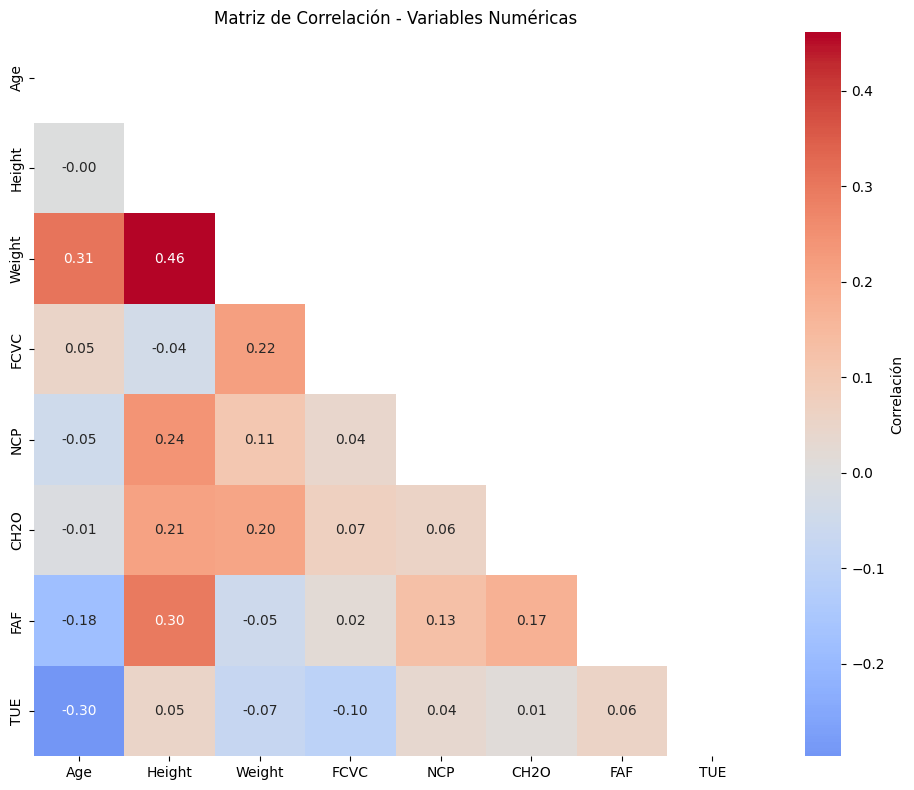


Correlaciones más fuertes:
             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.001726  0.305819  0.052303 -0.045648 -0.008924 -0.179619   
Height -0.001726  1.000000  0.461078 -0.037854  0.243601  0.211622  0.295740   
Weight  0.305819  0.461078  1.000000  0.216164  0.107022  0.200893 -0.053191   
FCVC    0.052303 -0.037854  0.216164  1.000000  0.041788  0.069282  0.017577   
NCP    -0.045648  0.243601  0.107022  0.041788  1.000000  0.056901  0.128882   
CH2O   -0.008924  0.211622  0.200893  0.069282  0.056901  1.000000  0.168828   
FAF    -0.179619  0.295740 -0.053191  0.017577  0.128882  0.168828  1.000000   
TUE    -0.297034  0.051411 -0.072994 -0.102888  0.035634  0.012865  0.055683   

             TUE  
Age    -0.297034  
Height  0.051411  
Weight -0.072994  
FCVC   -0.102888  
NCP     0.035634  
CH2O    0.012865  
FAF     0.055683  
TUE     1.000000  


In [36]:
# Matriz de correlación para variables numéricas
corr_matrix = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, ax=ax, cbar_kws={'label': 'Correlación'}, mask=mask)
ax.set_title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.savefig('images/correlacion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCorrelaciones más fuertes:")
print(corr_matrix)

#### 2.4.1 Scatter Plots por Clase

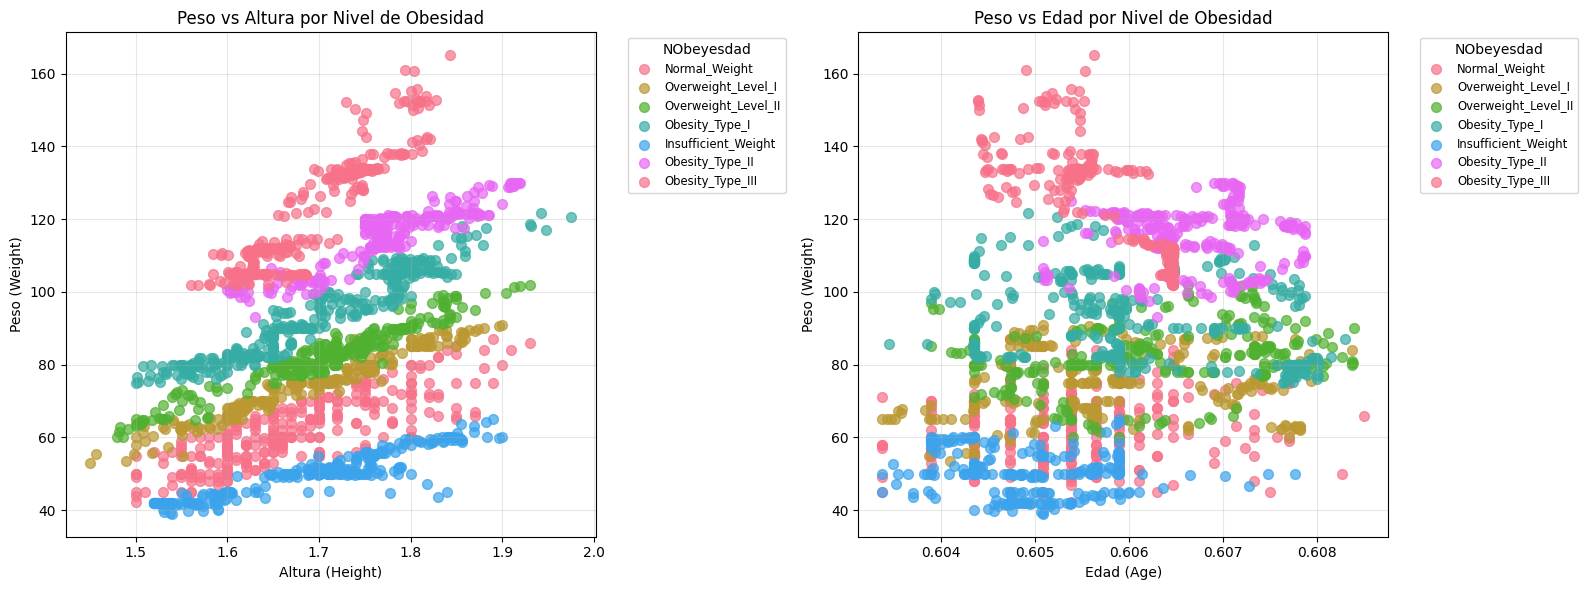

In [37]:
# Scatter plots de las variables más relevantes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

unique_labels = df[target_col].unique()

# 1. Weight vs Height
# Usamos un bucle para iterar sobre cada clase y asignarle un color
for label in unique_labels:
    mask = df[target_col] == label
    axes[0].scatter(df.loc[mask, 'Height'], df.loc[mask, 'Weight'], 
                    label=label, alpha=0.7, s=50)

axes[0].set_xlabel('Altura (Height)')
axes[0].set_ylabel('Peso (Weight)')
axes[0].set_title('Peso vs Altura por Nivel de Obesidad')
axes[0].grid(True, alpha=0.3)
axes[0].legend(title='NObeyesdad', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Weight vs Age
for label in unique_labels:
    mask = df[target_col] == label
    axes[1].scatter(df.loc[mask, 'Age'], df.loc[mask, 'Weight'], 
                    label=label, alpha=0.7, s=50)

axes[1].set_xlabel('Edad (Age)')
axes[1].set_ylabel('Peso (Weight)')
axes[1].set_title('Peso vs Edad por Nivel de Obesidad')
axes[1].grid(True, alpha=0.3)
axes[1].legend(title='NObeyesdad', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('images/scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

**Análisis de los Gráficos de Dispersión:**

*   **Peso vs Altura:** Se observa una muy clara distinción y separación de las clases. Las categorías de obesidad se organizan en bandas diagonales ascendentes. Esto tiene todo el sentido físico, ya que el índice de masa corporal (IMC) se calcula directamente a partir de estas dos variables ($Peso / Altura^2$), por lo que son los predictores más potentes.
*   **Peso vs Edad:** Aquí la distinción **no es tan clara**. Si bien puede haber ligeras tendencias, las clases están mucho más mezcladas a lo largo de los rangos de edad. Esto indica que la edad por sí sola no es un factor determinante exclusivo para clasificar el nivel de obesidad, sino que debe combinarse con otras variables.

### 2.5 Distribución de la Variable Objetivo

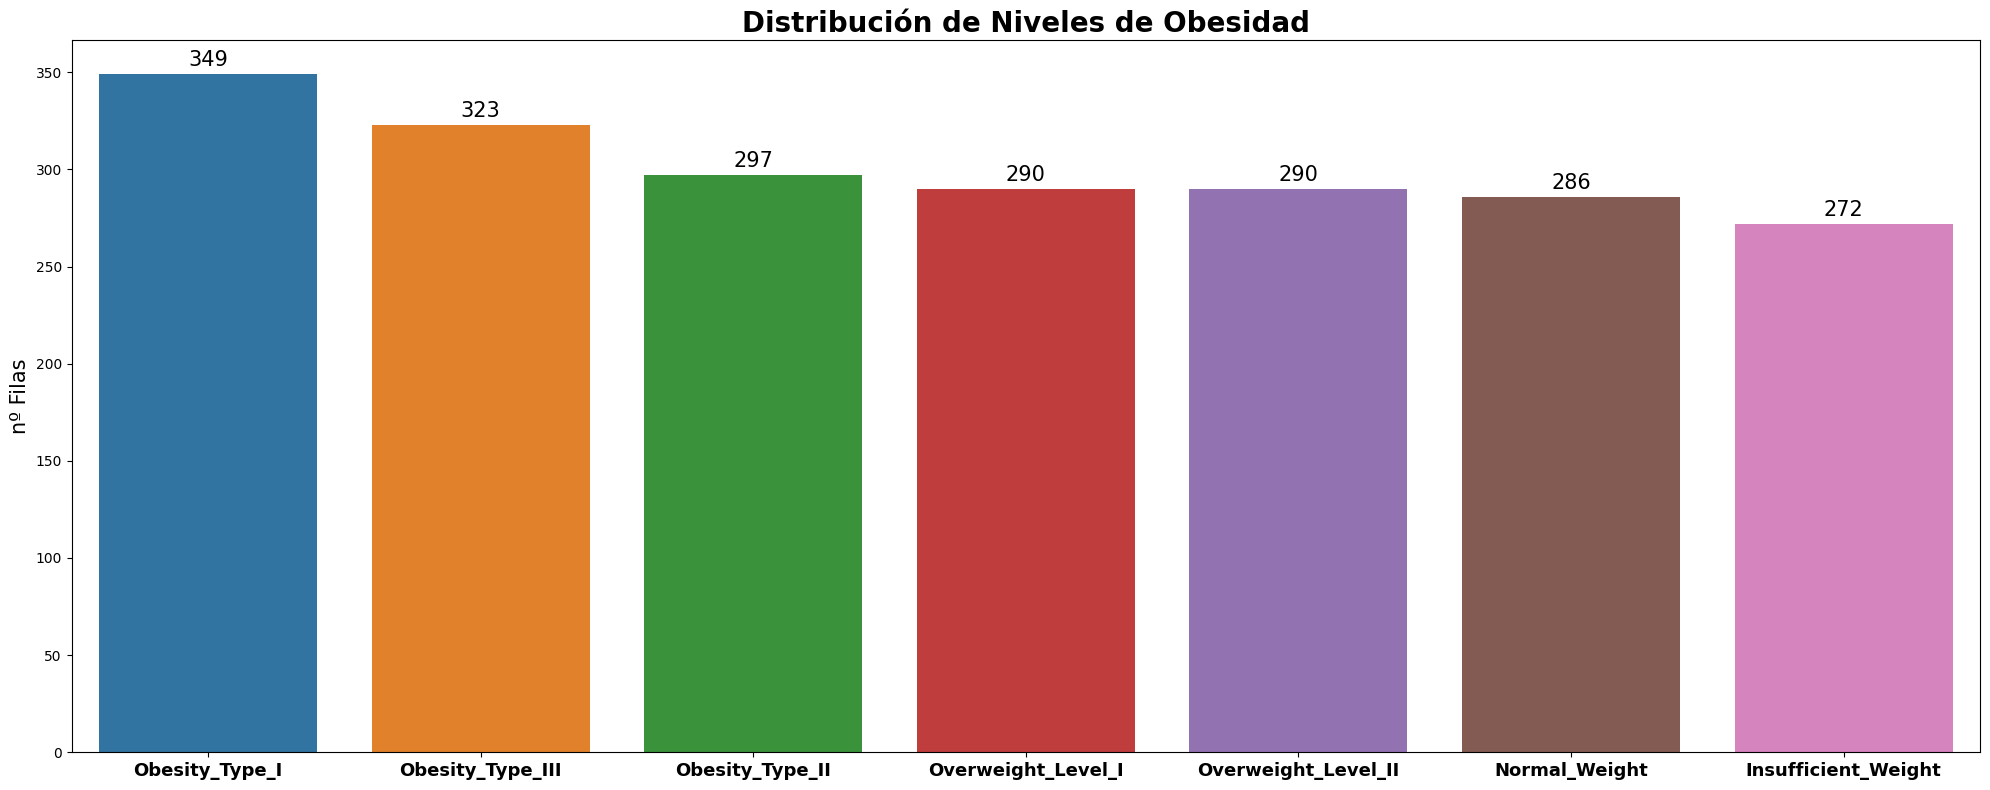


Conteo de clases:
NObeyesdad
Obesity_Type_I         349
Obesity_Type_III       323
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          286
Insufficient_Weight    272
Name: count, dtype: int64


In [38]:
# Distribución de clases
class_counts = df[target_col].value_counts()

plt.figure(figsize=(20, 8))

# Bar plot único usando Seaborn (estilo consistente)
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='tab10')
ax.set_title('Distribución de Niveles de Obesidad', fontsize=20, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('nº Filas', fontsize=15)
plt.xticks(ha='center', fontsize=13, fontweight='bold')

# Añadir valores sobre las barras
for i, v in enumerate(class_counts.values):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=15)

plt.tight_layout()
plt.savefig('images/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nConteo de clases:")
print(class_counts)

### 2.7 Visualización PCA

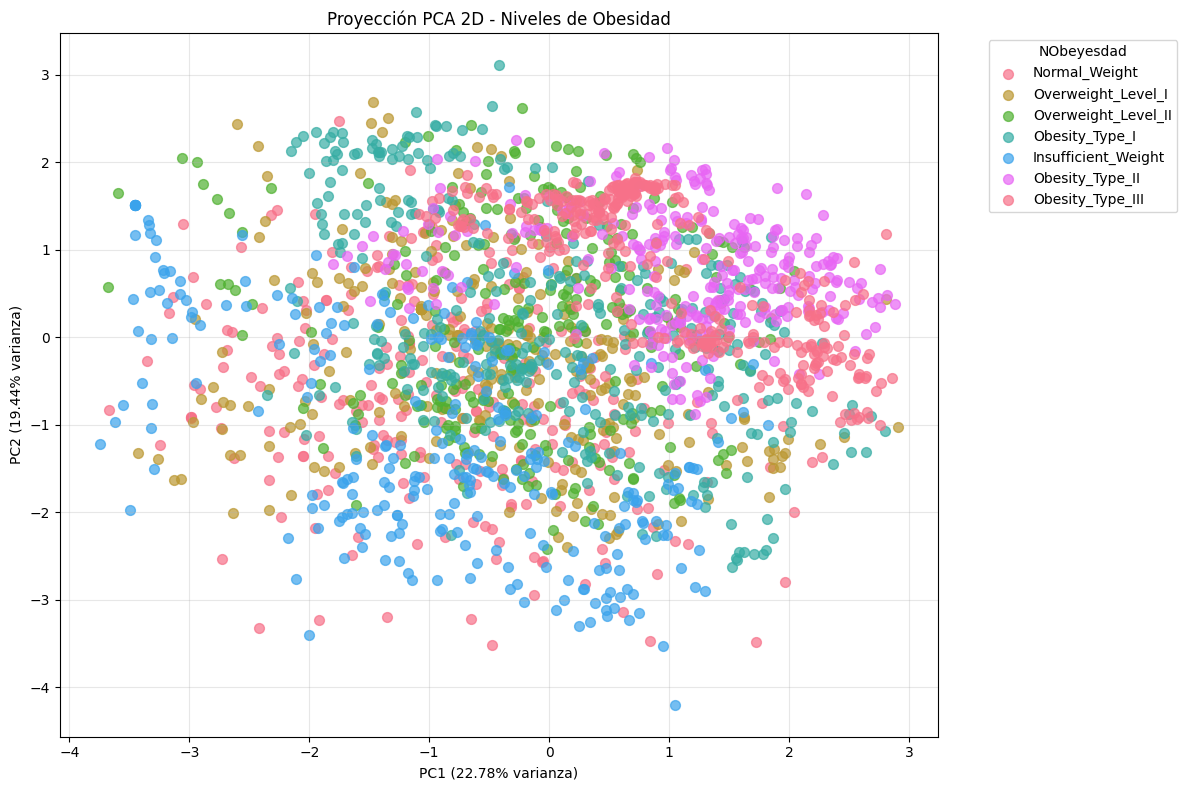

In [39]:
X_numeric = df[numeric_cols].copy()
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_numeric)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_pca)

# Visualización (estilo sencillo con bucle)
fig, ax = plt.subplots(figsize=(12, 8))

for label in df[target_col].unique():
    mask = df[target_col] == label
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], label=label, s=50, alpha=0.7)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
ax.set_title('Proyección PCA 2D - Niveles de Obesidad')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='NObeyesdad')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


Claramente NO son datos linealmente separables en esta proyección 2D. Las distintas clases (nubes de puntos) se superponen significativamente unas con otras. No es posible trazar una línea recta que separe una clase del resto sin cometer numerosos errores de clasificación.

## 3. Preprocesamiento de Datos

En esta etapa prepararemos los datos para que puedan ser interpretados correctamente por los modelos de Machine Learning. Esto incluye la codificación de variables categóricas.

### 3.1 Codificación de Variables

Los modelos matemáticos (como la Regresión Logística) trabajan con números, no con texto. Por tanto, debemos transformar nuestras variables categóricas:

*   **Label Encoding:** Asigna un número entero único a cada categoría (0, 1, 2...). Se usa para la **variable objetivo** o variables ordinales.
*   **One-Hot Encoding:** Crea nuevas columnas binarias (0 o 1) para cada categoría. Es fundamental para variables nominales (sin orden jerárquico) como `Gender` o `MTRANS`, para evitar que el modelo interprete órdenes falsos (ej: Tranporte_A > Transporte_B).

In [40]:
# Separar features y target
X = df.drop(columns=[target_col])
y = df[target_col]

# Codificar la variable objetivo
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print("Clases codificadas:")
for i, label in enumerate(le_target.classes_):
    print(f"  {i}: {label}")

Clases codificadas:
  0: Insufficient_Weight
  1: Normal_Weight
  2: Obesity_Type_I
  3: Obesity_Type_II
  4: Obesity_Type_III
  5: Overweight_Level_I
  6: Overweight_Level_II


In [41]:
# Codificar variables categóricas de features
X_processed = X.copy()

# Label encoding para variables binarias
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_cols:
    if col in X_processed.columns:
        le = LabelEncoder()
        X_processed[col] = le.fit_transform(X_processed[col])

# One-hot encoding para variables con múltiples categorías
multi_cat_cols = ['CAEC', 'CALC', 'MTRANS']
X_processed = pd.get_dummies(X_processed, columns=multi_cat_cols, drop_first=True)

print(f"Shape original: {X.shape}")
print(f"Shape después de encoding: {X_processed.shape}")
print(f"\nColumnas finales:")
print(X_processed.columns.tolist())

Shape original: (2107, 16)
Shape después de encoding: (2107, 23)

Columnas finales:
['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


### 3.2 División del Dataset (Train-Test Split)

Es crucial separar una parte de los datos para **test**. Nunca debemos evaluar el modelo con los mismos datos con los que entrenó, ya que solo mediríamos su capacidad de memorización (overfitting) y no su capacidad de generalizar a nuevos casos.

Usaremos un reparto **80% Entrenamiento - 20% Test**, utilizando `stratify` para mantener la misma proporción de clases de obesidad en ambos subconjuntos.

In [42]:
# Train-Test Split (80-20, estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print("=" * 50)
print("DIVISIÓN TRAIN-TEST")
print("=" * 50)
print(f"Train: {X_train.shape[0]} muestras ({100*X_train.shape[0]/len(X_processed):.0f}%)")
print(f"Test: {X_test.shape[0]} muestras ({100*X_test.shape[0]/len(X_processed):.0f}%)")

# Verificar estratificación
print("\nDistribución de clases en Train:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Clase {u}: {c} ({100*c/len(y_train):.1f}%)")

DIVISIÓN TRAIN-TEST
Train: 1685 muestras (80%)
Test: 422 muestras (20%)

Distribución de clases en Train:
  Clase 0: 218 (12.9%)
  Clase 1: 229 (13.6%)
  Clase 2: 279 (16.6%)
  Clase 3: 237 (14.1%)
  Clase 4: 258 (15.3%)
  Clase 5: 232 (13.8%)
  Clase 6: 232 (13.8%)


### 3.3 Preprocesamiento Post-Split: Estandarización y Filtrado de Outliers

#### ¿Por qué estandarizar?

Algoritmos como la Regresión Logística o SVM son **sensibles a la escala** de las variables. Una variable con rango [0, 10000] dominaría sobre otra en [0, 1], provocando que el modelo aprenda más lentamente o converja a soluciones subóptimas. La **Estandarización (Z-score)** transforma cada variable para que tenga media = 0 y desviación típica = 1, situando típicamente los valores en el rango **[-3, 3]**.

La fórmula aplicada es: $z = \frac{x - \mu}{\sigma}$

#### ¿Cómo se aplica aquí? → Dentro del Pipeline

En nuestro caso, la estandarización **no se realiza manualmente** en este paso, sino que se gestiona **internamente dentro del Pipeline** de scikit-learn (ver Sección 4). El Pipeline encadena un `StandardScaler` seguido del modelo, de forma que:

1. Al llamar a `pipeline.fit(X_train, y_train)`, el scaler aprende la media y desviación típica **solo de los datos de entrenamiento** (`fit`) y los transforma (`transform`).
2. Al llamar a `pipeline.predict(X_test)`, el scaler aplica la misma transformación al test **usando las estadísticas aprendidas del train** (`transform` sin `fit`).

Esto **elimina por completo el riesgo de Data Leakage**, ya que es imposible que las estadísticas del test contaminen el entrenamiento. Además, si combinamos el Pipeline con `cross_validate` o `GridSearchCV`, en cada fold la estandarización se recalcula de forma independiente, garantizando la integridad de la validación.

#### Filtrado de Outliers (Z-score > 3)

Lo único que realizamos manualmente en este paso es el **filtrado de outliers extremos** en el conjunto de entrenamiento. Calculamos los Z-scores de las variables numéricas de forma temporal (sin guardar la transformación) y eliminamos las muestras cuyo Z-score exceda ±3 en cualquier variable. Esto garantiza que valores extremos no distorsionen el aprendizaje del modelo.

In [43]:
# --- Preprocesamiento Post-Split: Filtrado de Outliers ---

# Calculamos Z-scores TEMPORALMENTE solo para detectar outliers.
# NO escalamos los datos permanentemente: el Pipeline se encargará de eso.
scaler_temp = StandardScaler()
X_train_zscores = scaler_temp.fit_transform(X_train[numeric_cols])

# Filtramos si alguna variable numérica excede 3 desviaciones estándar
mask_inliers = (np.abs(X_train_zscores) <= 3).all(axis=1)

rows_before = len(X_train)
X_train = X_train[mask_inliers].reset_index(drop=True)
y_train = y_train[mask_inliers]
rows_removed = rows_before - len(X_train)

print(f"--- Filtrado de Outliers en Train (Z-score > 3) ---")
print(f"Muestras originales en Train: {rows_before}")
print(f"Muestras eliminadas: {rows_removed}")
print(f"Muestras finales en Train: {len(X_train)}")
print(f"\nNota: La estandarización (Z-score) se realizará internamente en el Pipeline.")

--- Filtrado de Outliers en Train (Z-score > 3) ---
Muestras originales en Train: 1685
Muestras eliminadas: 0
Muestras finales en Train: 1685

Nota: La estandarización (Z-score) se realizará internamente en el Pipeline.


## 4. Entrenamiento y Evaluación de Modelos

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Diccionario para almacenar resultados
results = {}

### 4.1 Entrenamiento, Validación Cruzada y Evaluación con Pipeline

Usaremos un **Pipeline** de scikit-learn que encadena dos pasos: `StandardScaler` (estandarización) + `LogisticRegression` (modelo). Esto garantiza que:

*   La estandarización se aplica **automáticamente** en cada fold de la validación cruzada, sin riesgo de Data Leakage.
*   Al llamar a `pipeline.fit()`, el scaler aprende las estadísticas del train y transforma los datos antes de pasarlos al modelo.
*   Al llamar a `pipeline.predict()`, el scaler aplica la transformación al test usando las estadísticas del train.

Aplicamos **validación cruzada 5-Fold** desde el inicio para obtener una estimación robusta del rendimiento antes de evaluar en el conjunto de test final.

In [45]:
# Pipeline: Escalado + Regresión Logística
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Validación cruzada (5-Fold) desde el inicio
cv_results = cross_validate(
    pipeline_lr, X_train, y_train,
    cv=5,
    scoring=['accuracy', 'f1_weighted'],
    n_jobs=-1
 )

print("=" * 60)
print("VALIDACIÓN CRUZADA (5-Fold)")
print("=" * 60)
print(f"Accuracy Mean: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score Mean: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")

# Entrenamiento final del pipeline y evaluación en test
pipeline_lr.fit(X_train, y_train)
y_pred_pipe = pipeline_lr.predict(X_test)

results['Logistic Regression (Pipeline)'] = {
    'accuracy': accuracy_score(y_test, y_pred_pipe),
    'precision': precision_score(y_test, y_pred_pipe, average='weighted'),
    'recall': recall_score(y_test, y_pred_pipe, average='weighted'),
    'f1': f1_score(y_test, y_pred_pipe, average='weighted')
}

print("\n" + "=" * 50)
print("REGRESIÓN LOGÍSTICA")
print("=" * 50)
print(f"Accuracy: {results['Logistic Regression (Pipeline)']['accuracy']:.4f}")
print(f"Precision: {results['Logistic Regression (Pipeline)']['precision']:.4f}")
print(f"Recall: {results['Logistic Regression (Pipeline)']['recall']:.4f}")
print(f"F1-Score: {results['Logistic Regression (Pipeline)']['f1']:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pipe, target_names=le_target.classes_))

VALIDACIÓN CRUZADA (5-Fold)
Accuracy Mean: 0.8635 ± 0.0315
F1-Score Mean: 0.8613 ± 0.0317

REGRESIÓN LOGÍSTICA
Accuracy: 0.8910
Precision: 0.8901
Recall: 0.8910
F1-Score: 0.8897

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      1.00      0.95        54
      Normal_Weight       0.75      0.70      0.73        57
     Obesity_Type_I       0.92      0.96      0.94        70
    Obesity_Type_II       0.98      0.97      0.97        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.76      0.78      0.77        58
Overweight_Level_II       0.91      0.83      0.86        58

           accuracy                           0.89       422
          macro avg       0.89      0.89      0.89       422
       weighted avg       0.89      0.89      0.89       422



### 4.2 Matriz de Confusión (Pipeline)

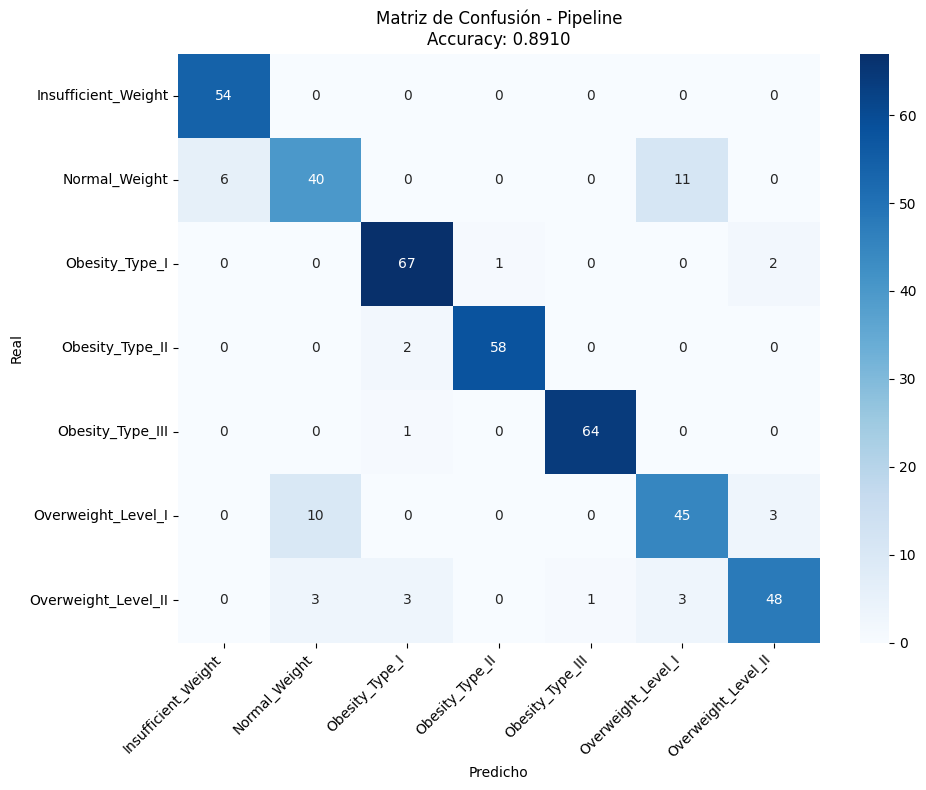

In [46]:
# Visualizar matriz de confusión (Pipeline)
cm = confusion_matrix(y_test, y_pred_pipe)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title(f"Matriz de Confusión - Pipeline\nAccuracy: {results['Logistic Regression (Pipeline)']['accuracy']:.4f}")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('images/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Optimización de Hiperparámetros con GridSearchCV

El modelo de Regresión Logística tiene hiperparámetros que podemos ajustar para mejorar el rendimiento. El más importante es **C** (inversa de la fuerza de regularización): valores pequeños de C implican más regularización (modelo más simple), mientras que valores grandes de C permiten mayor complejidad.

Usaremos **GridSearchCV** combinado con nuestro Pipeline, lo que garantiza que la estandarización se recalcula correctamente en cada fold de la búsqueda. GridSearchCV prueba exhaustivamente todas las combinaciones de hiperparámetros y selecciona la que maximiza la métrica elegida (F1-weighted en nuestro caso).

In [51]:
from sklearn.model_selection import GridSearchCV

# Pipeline con escalado + modelo (misma estructura que antes)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])

# Parámetros a tunear
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__max_iter': [1000, 2000]
}

# Grid search con validación cruzada 5-Fold
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid.fit(X_train, y_train)

print("=" * 60)
print("RESULTADOS GRID SEARCH")
print("=" * 60)
print(f"Mejor C: {grid.best_params_['model__C']}")
print(f"Mejor max_iter: {grid.best_params_['model__max_iter']}")
print(f"Mejor F1-Score CV: {grid.best_score_:.4f}")

# Evaluar el mejor modelo en test
y_pred_grid = grid.predict(X_test)

results['Logistic Regression (GridSearch)'] = {
    'accuracy': accuracy_score(y_test, y_pred_grid),
    'precision': precision_score(y_test, y_pred_grid, average='weighted'),
    'recall': recall_score(y_test, y_pred_grid, average='weighted'),
    'f1': f1_score(y_test, y_pred_grid, average='weighted')
}

print(f"\n--- Evaluación en Test (Mejor Modelo) ---")
print(f"Accuracy: {results['Logistic Regression (GridSearch)']['accuracy']:.4f}")
print(f"Precision: {results['Logistic Regression (GridSearch)']['precision']:.4f}")
print(f"Recall: {results['Logistic Regression (GridSearch)']['recall']:.4f}")
print(f"F1-Score: {results['Logistic Regression (GridSearch)']['f1']:.4f}")

print("\nClassification Report (Mejor Modelo):")
print(classification_report(y_test, y_pred_grid, target_names=le_target.classes_))

RESULTADOS GRID SEARCH
Mejor C: 10
Mejor max_iter: 1000
Mejor F1-Score CV: 0.9279

--- Evaluación en Test (Mejor Modelo) ---
Accuracy: 0.9360
Precision: 0.9365
Recall: 0.9360
F1-Score: 0.9359

Classification Report (Mejor Modelo):
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        54
      Normal_Weight       0.86      0.84      0.85        57
     Obesity_Type_I       0.94      0.97      0.96        70
    Obesity_Type_II       0.97      0.97      0.97        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.85      0.86      0.85        58
Overweight_Level_II       0.98      0.91      0.95        58

           accuracy                           0.94       422
          macro avg       0.93      0.93      0.93       422
       weighted avg       0.94      0.94      0.94       422

